# Demand Forecasting and Scenario Planning

This notebook implements an end-to-end demand forecasting workflow using a Seasonal ARIMA (SARIMA) model. The objective is to generate short-horizon forecasts with prediction intervals, evaluate forecast accuracy, construct alternative demand scenarios, and translate statistical outputs into planning-relevant insights. The analysis reflects how economists support operational decision-making under uncertainty.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

plt.style.use("default")

In [33]:
import pandas as pd

url = "https://raw.githubusercontent.com/Vamakshi6402/Demand_Forecasting_and_Scenario_Planning/main/data/demand_series.csv"

df = pd.read_csv(url, parse_dates=["date"])
df = df.set_index("date")
df


,demand
date,
2022-01-01,120
2022-02-01,128
2022-03-01,135
2022-04-01,142
2022-05-01,150
2022-06-01,148
2022-07-01,155
2022-08-01,160
2022-09-01,158


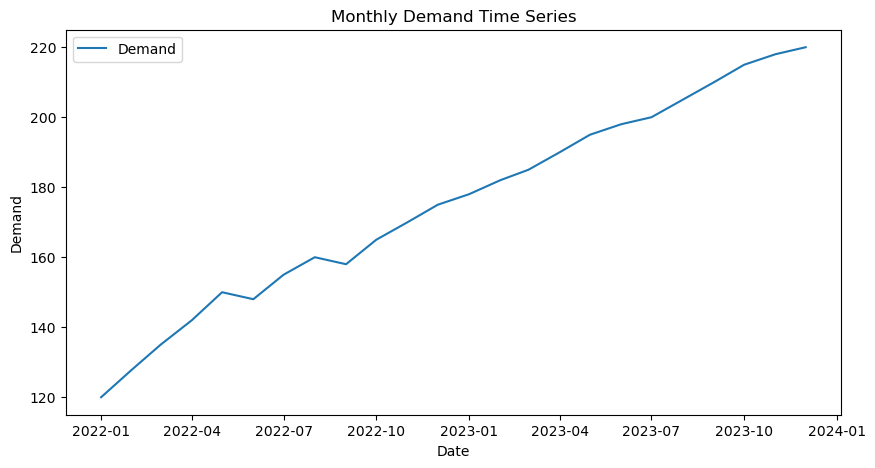

In [34]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df["demand"], label="Demand")
plt.title("Monthly Demand Time Series")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.show()

In [35]:
train = df.iloc[:-6]
test = df.iloc[-6:]

In [36]:
model = SARIMAX(
    train["demand"],
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False)
results.summary()

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tools\eval_measures.py:414: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tools\eval_measures.py:439: RuntimeWarning: invalid value encoun

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             demand   No. Observations:                   18
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Tue, 16 Dec 2025   AIC                             10.000
Time:                                    20:22:35   BIC                                nan
Sample:                                01-01-2022   HQIC                               nan
                                     - 06-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8750         -0        inf      0.000      -0.875      -0.875
ma.L1          1.9432         -0       -inf      0.000       1.943       1.943
ar.S.L12            0         -0        nan        nan           0           0
ma.S.L12            0         -0        nan        nan           0           0
sigma2          1e-10         -0       -inf      0.000       1e-10       1e-10
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [37]:
forecast_res = results.get_forecast(steps=len(test))
forecast_mean = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

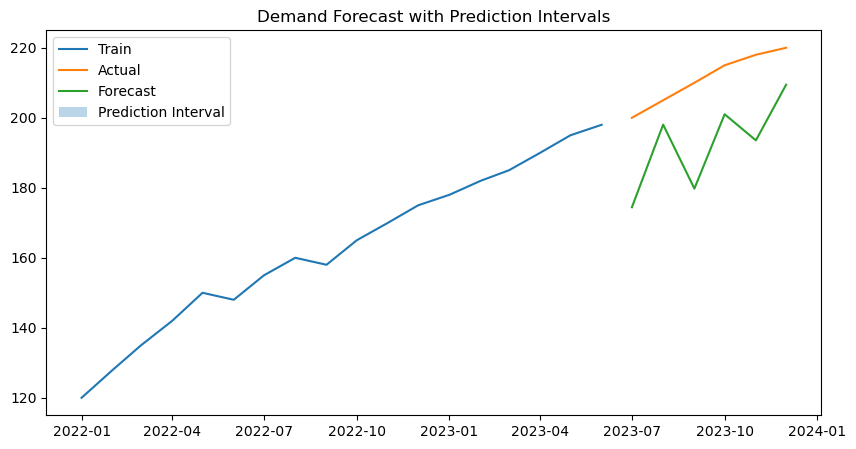

In [38]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train["demand"], label="Train")
plt.plot(test.index, test["demand"], label="Actual")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast")

plt.fill_between(
    forecast_mean.index,
    conf_int.iloc[:,0],
    conf_int.iloc[:,1],
    alpha=0.3,
    label="Prediction Interval"
)

plt.title("Demand Forecast with Prediction Intervals")
plt.legend()
plt.show()

In [39]:
rmse = mean_squared_error(test["demand"], forecast_mean) ** 0.5
mape = mean_absolute_percentage_error(test["demand"], forecast_mean)

metrics = pd.DataFrame({
    "RMSE": [rmse],
    "MAPE": [mape]
})

metrics

,RMSE,MAPE
0,20.497809,0.088488


In [40]:
import os

os.makedirs("outputs", exist_ok=True)
metrics.to_csv("outputs/metrics.csv", index=False)